# Numpy.random

[Numpy.random](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html) is a collection of methods for random number generations, permutations and number distributions created by [numpy](http://www.numpy.org/). 

## Random generator
The random number generator relies on an implementation of [Mersenne Twister](https://blogs.mathworks.com/cleve/2015/04/17/random-number-generator-mersenne-twister/) random number generator to generate the random numbers.

It generates pseudorandom numbers which menas they are not entirely random and can repeat overtime. To overcome _seed_ has been implemented which makes the number more random like.

## Simple random data
Simple random sampling means each element of a given data has the same propability to be selected.
Each result is sampled from the sicrete uniform distribution of the given input.

### Random Floating Point Number Generation
#### numpy.random.rand
Returns a number of random numbers between 0 and 1. If there are no parameters provided to the method it retunrs only one number. If there is any amount of parameter provided to the method it returns a shape filled with random numbers between 0 and 1


In [1]:
#import random number generator
import numpy.random as npr
#import numpy
import numpy as np
#import pyplot for diagrams
import matplotlib.pyplot as plt
#Import scipy stats and specials for pdf generation
import scipy.stats as stats
import scipy.special as sps
#import counter for duplicate detection
from collections import Counter

In [2]:
print('Simple random number:')
print(npr.rand())
print('\n1D array of 10 numbers:')
print(npr.rand(10))
print('\n2D array of 3 numbers:')
print(npr.rand(2,3))

Simple random number:
0.9034697665686281

1D array of 10 numbers:
[0.44407411 0.96718168 0.17836685 0.68627569 0.56951887 0.56329242
 0.81271671 0.17348568 0.68328882 0.7330819 ]

2D array of 3 numbers:
[[0.22536579 0.93860885 0.39727269]
 [0.49489844 0.22439491 0.2146542 ]]


The number of diemsnions can be as large as 32. With large arrays it has to be considered how much memory is available. 32bit python can access only 4GB

Text(0.5, 0.98, 'Distribution of 10000 random numbers (discrete uniform distribution)')

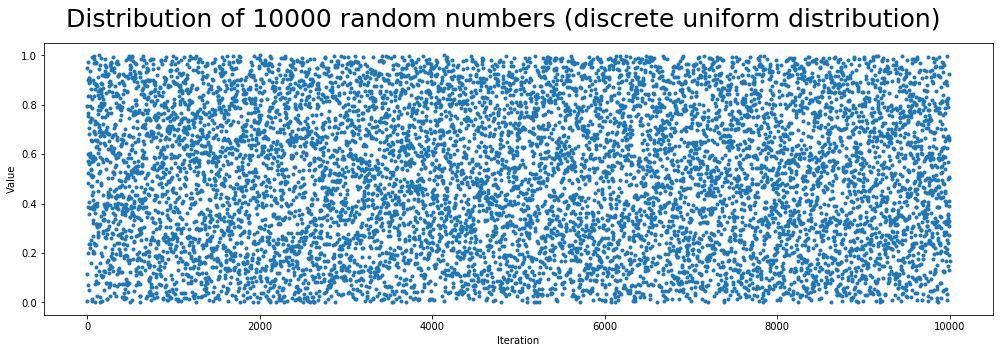

In [3]:
rn=npr.rand(10000)
#Cretae figure
fig = plt.figure(figsize=(17,5))
#Add 1000 random points a plot
p=fig.add_subplot(111)
p.plot(rn,'.')
p.set_xlabel("Iteration")
p.set_ylabel("Value")
#Add label to the figure
fig.suptitle("Distribution of 10000 random numbers (discrete uniform distribution)",fontsize=25)

In [4]:
#https://stackoverflow.com/questions/11528078/determining-duplicate-values-in-an-array
print('Duplicates:',(Counter(rn) - Counter(set(rn))).keys())

Duplicates: dict_keys([])


It is visible on the above figure how well tha random number generator performs. Some of the numbers are really close but there are no duplicates or large gaps. (I tested with 10000000 numbers as well)
#### numpy.random.random_sample
Returns numbers from 0 to 1 in continuous uniform distribution where 0 is inclusive.

It only takes one argument this argument either a number which represents the number of values required or it is a shape.


In [5]:
print('Simple random number:')
print(npr.random_sample())
print('\n1D array of 10 numbers:')
print(npr.random_sample(10))
print('\n2D array of 3 numbers:')
print(npr.random_sample((2,3)))

Simple random number:
0.23048457657201293

1D array of 10 numbers:
[0.16434772 0.67182447 0.65259776 0.01968995 0.08873123 0.33894627
 0.1704188  0.11333796 0.67930549 0.702488  ]

2D array of 3 numbers:
[[0.48539669 0.34844495 0.95086484]
 [0.25959402 0.36684994 0.70005993]]


Text(0.5, 0.98, 'Distribution of 10000 random numbers (continuous uniform distribution)')

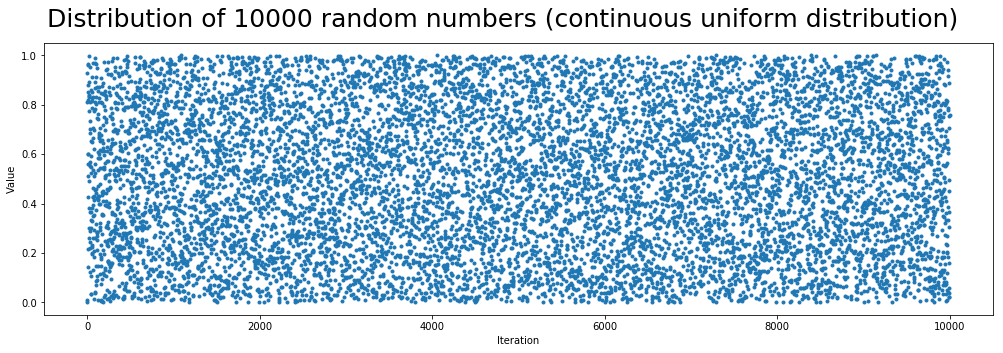

In [6]:
rn5=npr.random_sample(10000)
#Cretae figure
fig = plt.figure(figsize=(17,5))
#Add 1000 random points a plot
p=fig.add_subplot(111)
p.plot(rn5,'.')
p.set_xlabel("Iteration")
p.set_ylabel("Value")
#Add label to the figure
fig.suptitle("Distribution of 10000 random numbers (continuous uniform distribution)",fontsize=25)

In [7]:
#https://stackoverflow.com/questions/11528078/determining-duplicate-values-in-an-array
print('Duplicates:',(Counter(rn5) - Counter(set(rn5))).keys())

Duplicates: dict_keys([])


#### numpy.random.randn
It is the normal distribution version of ```rand```. Normal distribution means instead of every item having the same probability to be selected, some items have higher probability.

The numbers are not limited bewteen 0 and 1 and also can be negative numbers, however they are still floating point numbers.

In [8]:
print('Simple random number:')
print(npr.randn())
print('\n1D array of 10 numbers:')
print(npr.randn(10))
print('\n2D array of 3 numbers:')
print(npr.randn(2,3))

Simple random number:
-0.44683566046798334

1D array of 10 numbers:
[ 0.71392754 -1.05579714 -0.67152828 -0.81644094 -0.59168274 -0.04874399
 -0.68451176 -1.63251086  0.09072877  0.76896538]

2D array of 3 numbers:
[[ 0.48831729  0.61002437  0.66424703]
 [-0.10045042 -0.7777066   1.32885686]]


Text(0.5, 0.98, 'Distribution of 10000 random numbers (normal disribution)')

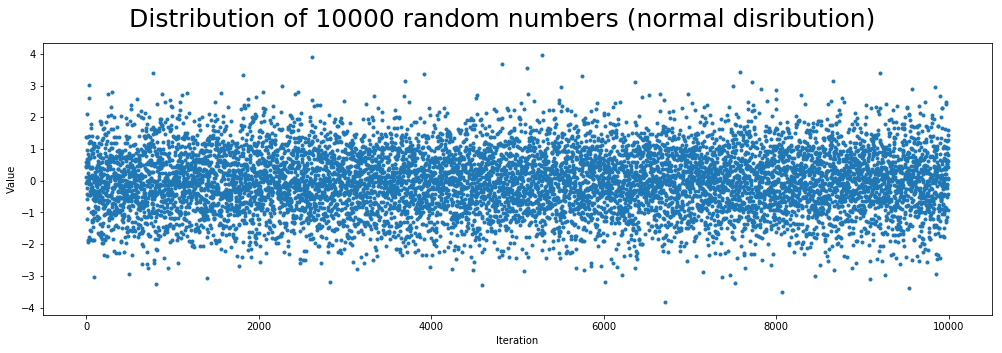

In [9]:
rn2=npr.randn(10000)
#Cretae figure
fig = plt.figure(figsize=(17,5))
#Add 1000 random points a plot
p=fig.add_subplot(111)
p.plot(rn2,'.')
p.set_xlabel("Iteration")
p.set_ylabel("Value")
#Add label to the figure
fig.suptitle("Distribution of 10000 random numbers (normal disribution)",fontsize=25)

In [10]:
#https://stackoverflow.com/questions/11528078/determining-duplicate-values-in-an-array
print('Duplicates:',(Counter(rn2) - Counter(set(rn2))).keys())


Duplicates: dict_keys([])


The numbers are not evenly distributed anymore. They tend to be closer to 0 and close to each other. It is less dense as going to smaller or bigger numbers. 

### Random Integer Generation

#### numpy.random.randint
Returns integers between two input parameteres:
* low - the lowest number inclusive
* high - the highest number exclusive

When one side of the bounds is inclusive and other is excluse, we are talking about half-open (or half-closed) interval. If the `low` is 0 and `high` is 1, it means 0 or more and less than 1 but not one. 

Takes four paramteres as input. The boundaries the shape of returned data and the data type to return. Only the lowest possible value is mandatory the rest of the parameters are optional.

`low` can be negative only if _high_ is specified.
`dtype` can be any integer type:
    * `int_`   Default integer type (same as C long; normally either int64 or int32)
    * `intc`   Identical to C int (normally int32 or int64)
    * `intp`   Integer used for indexing (same as C ssize_t; normally either int32 or int64)
    * `int8`   Byte (-128 to 127)
    * `int16`  Integer (-32768 to 32767)
    * `int32`  Integer (-2147483648 to 2147483647)
    * `int64`  Integer (-9223372036854775808 to 9223372036854775807)


In [11]:
print('Simple random number:')
print(npr.randint(100))
print('\n1D array of 10 numbers:')
print(npr.randint(-10,10,(10)))
print('\n2D array of 100 numbers witha int8 type:')
print(npr.randint(-10,10,(10,10),'int8'))

Simple random number:
14

1D array of 10 numbers:
[-4 -3  2 -8 -6  7 -2 -2 -3  2]

2D array of 100 numbers witha int8 type:
[[ -3  -9   4  -8   7   6   2   0   0   0]
 [ -2   8   4   3   2   7   4   1   7  -2]
 [ -8  -8   4  -4   2   7 -10  -3   0  -1]
 [  7  -5   0  -1   7 -10  -8  -8   6   1]
 [  2   2  -4   9   0   3  -1   9   2   5]
 [ -3  -8  -4  -5   5   4   3   8 -10   2]
 [  7   3  -3  -5  -1  -8  -1   3  -1   8]
 [ -7   4   2  -6   1  -9   9  -7   0   1]
 [ -3  -4   6   9  -2  -3   9   8   8   8]
 [  7  -7   4  -8   7 -10   0  -2   9   8]]


In [12]:
rn3=npr.randint(-10,10,(100))
print('Duplicates:',(Counter(rn3) - Counter(set(rn3))).keys())
rn4=npr.randint(-1000,1000,(100))
print('Duplicates:',(Counter(rn4) - Counter(set(rn4))).keys())

Duplicates: dict_keys([3, 6, -1, -6, 5, -9, -10, -4, 4, -5, -2, 8, -8, -7, 1, 7, 0, -3])
Duplicates: dict_keys([936])


It is clearly visible the numbers can reapeat and -10 is inlusive. The repetition is obvious as there is 20 number to sample from and 100 is needed. The probability of repetition is lower if the range higher than the desired amount of numbers, but it is not eliminated.

#### numpy.random.random_integers
This method is deprecated in favour of randint. The difference is:
* Both boundaries are inclusive
* Datatype cannot be specified
* If high is None, then results are from \[1, low\]



### Random values from array
`numpy.random.choice` is used to return a random amount of values from a given [ndarray](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html)

Reguires at least one argument `a`. `a` can be either an `ndarray` to chose the values from or and integer. If an integer is provided then an array is generated with [range](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.arange.html) (for example if it is 5 then \[0,1,2,3,4,5\] generated as value)

Optional parameters are:
   * `size`   If it is an int then its the length of a 1D array. If it is a shape then the returned values are shaped the same.
   * `replace`   Whether the to use replace or not.(Replace means the chosen item is put back so can repeat)
   * `p` Array of propabilities. Uniform distribution is used if it is not provided. 

In [13]:
r=np.arange(10)
print("Sample range:\n",r)
print("Select one element of sample:\n",npr.choice(r))
print("Select 4 element of sample and resape to a 2D array:\n",npr.choice(r,(2,2)))
print("Select 8 element of sample and resape to a 2D array without replace:\n",npr.choice(r,(2,4), False))
print("Select 2 element of sample with high probability on number 4:\n",npr.choice(r,(2,4), p=[0.05,0.05,0.05,0.05,0.55,0.05,0.05,0.05,0.05,0.05]))

rs=['one','two','three']
print("Sample range of strings:\n",rs)
print("Select one element of sample:\n",npr.choice(rs))

Sample range:
 [0 1 2 3 4 5 6 7 8 9]
Select one element of sample:
 9
Select 4 element of sample and resape to a 2D array:
 [[7 7]
 [1 7]]
Select 8 element of sample and resape to a 2D array without replace:
 [[7 3 4 2]
 [8 1 9 0]]
Select 2 element of sample with high probability on number 4:
 [[5 4 5 8]
 [4 4 8 4]]
Sample range of strings:
 ['one', 'two', 'three']
Select one element of sample:
 one


### Other random float generators
`ranf`,`random`,`random_sample`, and `sample` are doing the same. They all return values from continuous uniform distribution between 0 and 1 where 0 is inclusive.

They all take one parameter `size`. This parameter is either a shape or `None`. If it is `None` the a single value is returned.

In [14]:
print("ranf(5,):\n",npr.ranf((5,)))
print("random(5,):\n",npr.random((5,)))
print("random_sample(5,):\n",npr.random_sample((5,)))
print("sample(5,):\n",npr.sample((5,)))

ranf(5,):
 [0.7601903  0.70226915 0.91787268 0.26180204 0.54360553]
random(5,):
 [0.60976836 0.34917536 0.65022245 0.71789274 0.36256577]
random_sample(5,):
 [0.83154387 0.90012073 0.53875882 0.91263053 0.44604054]
sample(5,):
 [0.06012309 0.27307191 0.7331747  0.07481053 0.43561324]


### Random byte generator
`numpy.random.bytes` returns a set of random bytes of a given length. Takes only one paramter which is the length of the return bytes.

In [15]:
print('Random bytes:\n',np.random.bytes(10))

Random bytes:
 b'\x18\xf2p\x18\xff/\xb5e\xf7\x85'


## Permutations

### numpy.random.shuffle
Rearranges the contents of an array in-place, which means it does not return a new array. If a multidimensional array is passed in. Only the first dimesnion is mixed up every subarray remains the same.

In [16]:
ars=['zero','one','two','three','four','five','six','seven','eight','nine','ten','eleven']
print('Original order:\n',ars)
npr.shuffle(ars)
print('Shuffled order:\n',ars)
ars=np.array(ars).reshape(3,4)
print('Reshaped:\n',ars)
npr.shuffle(ars)
print('Shuffled 2D array:\n',ars)

Original order:
 ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'eleven']
Shuffled order:
 ['three', 'ten', 'five', 'zero', 'nine', 'four', 'two', 'eight', 'one', 'eleven', 'seven', 'six']
Reshaped:
 [['three' 'ten' 'five' 'zero']
 ['nine' 'four' 'two' 'eight']
 ['one' 'eleven' 'seven' 'six']]
Shuffled 2D array:
 [['nine' 'four' 'two' 'eight']
 ['three' 'ten' 'five' 'zero']
 ['one' 'eleven' 'seven' 'six']]


### numpy.random.permutation
Rearranges the contents of an array or range into a new array. If a multidimensional array is passed in. Only the first dimesnion is mixed up every subarray remains the same. If an integer is passed in it creates a range with `np.arange` and permutates that.

In [17]:
print('Permutated range 10:\n',npr.permutation(10))
ars=['zero','one','two','three','four','five','six','seven','eight','nine','ten','eleven']
print('Original order:\n',ars)
print('Shuffled order:\n',npr.permutation(ars))
ars=np.array(ars).reshape(3,4)
print('Reshaped:\n',ars)
print('Shuffled 2D array:\n',npr.permutation(ars))

Permutated range 10:
 [7 0 2 9 1 3 8 4 5 6]
Original order:
 ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'eleven']
Shuffled order:
 ['nine' 'six' 'ten' 'zero' 'three' 'eight' 'one' 'four' 'eleven' 'five'
 'seven' 'two']
Reshaped:
 [['zero' 'one' 'two' 'three']
 ['four' 'five' 'six' 'seven']
 ['eight' 'nine' 'ten' 'eleven']]
Shuffled 2D array:
 [['eight' 'nine' 'ten' 'eleven']
 ['four' 'five' 'six' 'seven']
 ['zero' 'one' 'two' 'three']]


## Distrubutions
Numpy's `random` package supplies a number of different distribution algorithms for random number generation. 

### Normal distribution
The numbers are distributed centered to a value. When the data is visualised it shows most of the values are closer to the center value and a symmetric bell shape can be drawn on it.

In [18]:
#Generate 1000 normal distributed numbers centered arount 0 with 0.1 as maximum and -0.1 is minimum
dn=npr.normal(0,0.1,1000)
print('Normal distributed:\n',dn)

Normal distributed:
 [ 3.75516208e-02 -8.24539103e-02 -4.35309346e-02  1.31304409e-01
  1.56901915e-02  1.77655605e-01 -8.11805583e-02 -1.01398130e-01
  9.56564709e-02  1.09035985e-02  4.33646898e-02  1.10521182e-01
 -7.15285967e-02  5.62617723e-02  3.34483571e-01 -2.45839568e-01
  8.53185126e-02  1.88866664e-01 -4.52765656e-02  1.30742962e-01
 -9.57849185e-03  5.48248510e-02 -1.07942877e-01 -7.09226477e-03
 -3.45111193e-02  2.89393173e-02 -1.39457468e-03 -4.52991832e-02
 -1.01399302e-01 -6.27956200e-02  4.59202476e-02 -1.56471071e-02
  1.31777094e-01 -6.63642049e-02 -2.47453500e-01  3.20620697e-02
 -4.96433036e-02  4.41817962e-03 -2.23112867e-03 -2.27189975e-01
  1.60684427e-01 -3.35266108e-02 -5.66512679e-02  2.92921984e-02
  1.02390348e-01 -5.35631724e-02  1.37305673e-01  1.14160719e-01
  7.70641738e-02 -3.98502159e-02 -3.62798243e-02 -5.13534071e-02
  6.02761740e-02 -5.52082026e-02  8.76642458e-02  1.40778190e-01
  1.71915089e-01  9.17980773e-02  4.67958521e-02 -2.13207091e-01
  1.

Text(0.5, 0.98, 'Normal distribution of 1000 numbers centered to 0 with 0.1 spread')

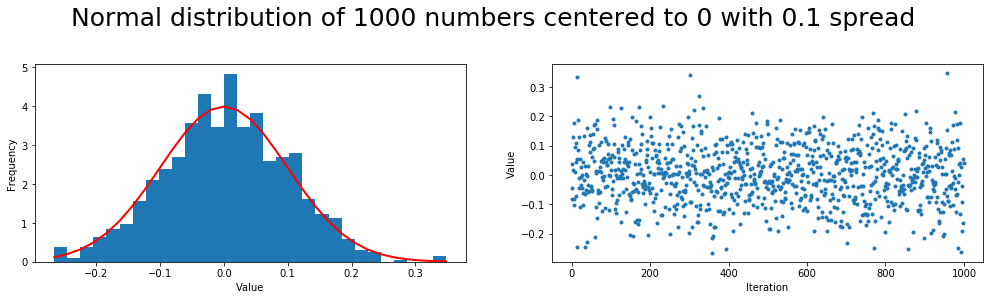

In [19]:
#Create figure
fig = plt.figure(figsize=(17,8))
p=fig.add_subplot(221)
#Cretae histogram
count, bins, ignored = plt.hist(dn, 30, density=True,)
#Add bellcurve
p.plot(bins, 1/(0.1 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - 0)**2 / (2 * 0.1**2) ),
          linewidth=2, color='r')
p.set_xlabel("Value")
p.set_ylabel("Frequency")

p2=fig.add_subplot(222)
#Create scatter digaram
p2.plot(dn,'.')
p2.set_xlabel("Iteration")
p2.set_ylabel("Value")
#Add label to the figure
fig.suptitle("Normal distribution of 1000 numbers centered to 0 with 0.1 spread",fontsize=25)


### Beta distribution
_The Beta distribution is a special case of the Dirichlet distribution, and is related to the Gamma distribution._

In [20]:
#cretae 1000 numbers with alfa 0.5 and beta 0.5
db=npr.beta(0.5,0.5,1000)
print('Normal distributed:\n',db)

Normal distributed:
 [9.64077122e-01 9.98122613e-01 3.33010886e-01 1.79086651e-01
 2.23233270e-01 9.98997180e-01 7.16442123e-01 2.05980233e-01
 9.71677021e-02 2.14671164e-01 6.58992031e-01 7.30647154e-01
 1.98168753e-01 3.94515787e-02 9.97615339e-01 4.53029656e-02
 1.89091146e-01 1.80757823e-02 9.89261549e-04 2.87306745e-01
 6.72568959e-01 2.43075876e-02 8.98286037e-01 3.53433606e-02
 8.83906742e-01 1.82587055e-02 9.12460711e-01 9.86232491e-03
 9.69431045e-01 2.41702840e-01 3.61015476e-01 8.67488178e-01
 5.34935344e-01 9.19536213e-01 6.45220284e-01 7.41688623e-01
 9.99552225e-01 1.10576207e-01 6.14801769e-01 3.55210692e-01
 8.03266786e-01 4.94643700e-01 5.03759673e-02 9.30063334e-01
 4.70578664e-03 3.71818355e-01 9.93334895e-10 7.35650144e-01
 2.21047084e-01 6.18389167e-01 9.69975177e-01 7.96305207e-05
 7.60689748e-02 9.75106814e-01 9.46818716e-01 6.93452103e-02
 9.67182246e-02 2.38075093e-04 6.69590791e-01 4.00681193e-01
 4.32736189e-02 5.89037895e-01 6.06031706e-01 4.96279687e-03
 5.

Text(0.5, 0.98, 'Beta distribution of 1000 numbers with alpha 0.5 and beta 0.5')

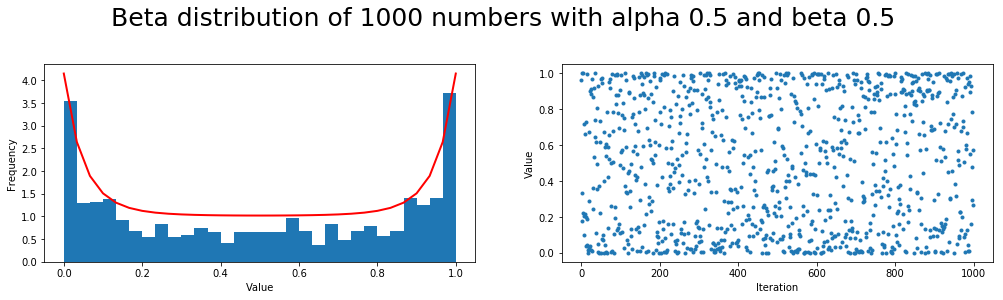

In [21]:
#Create figure
fig = plt.figure(figsize=(17,8))
p=fig.add_subplot(221)
#Cretae histogram
count, bins, ignored = plt.hist(db, 30, density=True,)
#Add curve
p.plot(bins, ((1 / (np.sqrt(2 * np.pi) * 20)) *(np.exp(0.09 * (15* (bins - 0.5))**2))+1),
          linewidth=2, color='r')

p.set_xlabel("Value")
p.set_ylabel("Frequency")

p2=fig.add_subplot(222)
#Create scatter digaram
p2.plot(db,'.')
p2.set_xlabel("Iteration")
p2.set_ylabel("Value")
#Add label to the figure
fig.suptitle("Beta distribution of 1000 numbers with alpha 0.5 and beta 0.5",fontsize=25)

### Binominal distribution
Draws samples from a binominal distribution. The distribution is generated with specific values, `n` trials and `p` possibility. Possibility is between 0 and 1. 
The whole test can be repeated with the third argument. It can be either an integer or a tuple.

Binominal distribution is used when the outcome can be one of two choices, but not both. If there is more than two possible outcomes, we are talking about Multidominal distribution.

In [22]:
#https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.binomial.html#numpy.random.binomial
n, p = 10, 0.5 # number of trials, probability of each trial
dp = np.random.binomial(n, p, 1000)

Text(0.5, 0.98, 'Binominal distribution of flipping a coin 10 times, tested 1000 times')

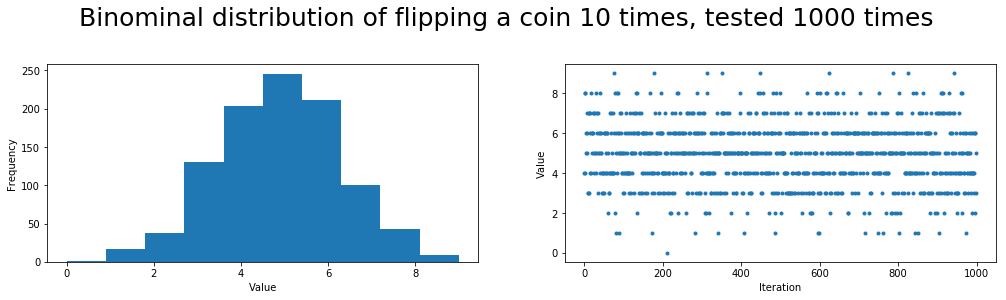

In [23]:
#Create figure
fig = plt.figure(figsize=(17,8))
p=fig.add_subplot(221)
#Cretae histogram
p.hist(dp)
p.set_xlabel("Value")
p.set_ylabel("Frequency")

p2=fig.add_subplot(222)
#Create scatter digaram
p2.plot(dp,'.')
p2.set_xlabel("Iteration")
p2.set_ylabel("Value")
#Add label to the figure
fig.suptitle("Binominal distribution of flipping a coin 10 times, tested 1000 times",fontsize=25)

### Chi-squared distribution
A Chi-squared distribution is the squarred and summed values of normal distribution. Each value of a normal distributions is squarred and summed together.
Takes only the degrees of freedom and the samples to be drwan. The second parameter can be a tuple or a single number.

In [24]:
dc=npr.chisquare(2,1000)
print(dc)

[2.58246765e-01 1.56579108e-01 2.45683233e+00 4.73779445e+00
 4.22367484e+00 5.00537188e-01 5.05890366e+00 1.55204623e+00
 1.35443844e+00 1.13321585e-01 2.37046478e+00 2.70665820e-01
 2.98342588e+00 1.65457510e+00 2.19499888e+00 3.06184572e-01
 2.02629792e-02 4.11737926e-01 3.22194659e+00 1.73515612e-01
 1.76074793e+00 6.58802850e-01 2.30911376e-01 1.07147792e+00
 5.64772832e-01 4.80160463e+00 4.68777264e+00 6.85819763e-01
 2.17322877e+00 1.76770348e+00 9.57734167e-01 7.93172717e+00
 8.23973464e+00 3.08235245e+00 6.15363385e-01 5.86449210e-01
 1.93971160e+00 5.92339530e-01 2.97230948e-02 2.35284830e+00
 1.62194166e+00 1.06541268e+00 3.19679923e+00 5.99834701e-02
 3.06355217e-02 6.26134878e-01 2.63027990e-01 1.55919712e+00
 2.59398088e-02 1.17228505e+00 2.64384633e+00 2.71851288e+00
 1.32379916e+00 4.30609211e-01 4.14762633e+00 1.06470612e+00
 8.60780469e-01 9.65467436e-01 6.77696283e-01 2.35584377e+00
 2.22399571e+00 6.75627315e-01 1.97421186e+00 4.81473970e-01
 9.34476913e-01 6.246748

Text(0.5, 0.98, 'Chi-squared distribution of 1000 samples with 2 degrees of freedom')

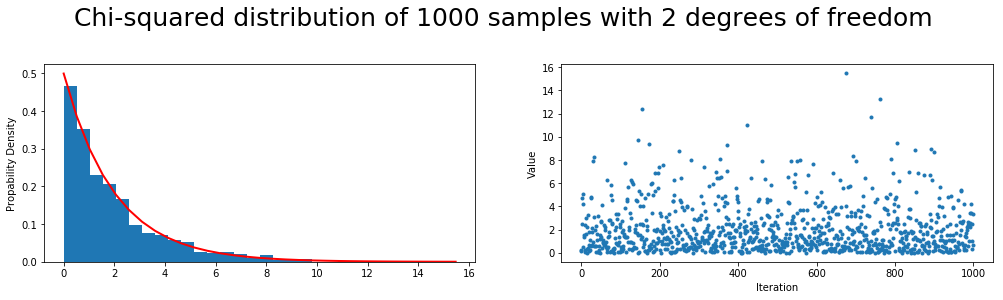

In [25]:
#Create figure
fig = plt.figure(figsize=(17,8))
p=fig.add_subplot(221)
#Cretae histogram
#p.hist(dc)
count, bins, ignored = plt.hist(dc, 30, density=True,)
#Add curve
p.plot(bins, stats.chi2.pdf(bins, df=2),linewidth=2, color='r')
p.set_ylabel("Propability Density")

p2=fig.add_subplot(222)
#Create scatter digaram
p2.plot(dc,'.')
p2.set_xlabel("Iteration")
p2.set_ylabel("Value")
#Add label to the figure
fig.suptitle("Chi-squared distribution of 1000 samples with 2 degrees of freedom",fontsize=25)

Text(0.5, 0.98, 'Chi-squared distribution of 20 samples with different degrees of freedom')

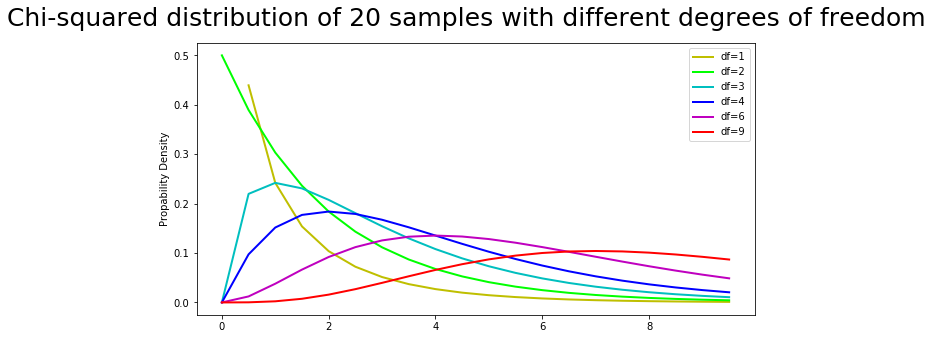

In [26]:
#Create data
csd=np.arange(10,step=0.5)
#Create figure
fig = plt.figure(figsize=(10,5))
p=fig.add_subplot(111)
#Add curve
p.plot(csd,stats.chi2.pdf(csd, df=1),linewidth=2, color='y', label="df=1")
p.plot(csd,stats.chi2.pdf(csd, df=2),linewidth=2, color='lime', label="df=2")
p.plot(csd,stats.chi2.pdf(csd, df=3),linewidth=2, color='c',label="df=3")
p.plot(csd,stats.chi2.pdf(csd, df=4),linewidth=2, color='b',label="df=4")
p.plot(csd,stats.chi2.pdf(csd, df=6),linewidth=2, color='m',label="df=6")
p.plot(csd,stats.chi2.pdf(csd, df=9),linewidth=2, color='r',label="df=9")
p.set_ylabel("Propability Density")
p.legend(loc='upper right')
#Add label to the figure
fig.suptitle("Chi-squared distribution of 20 samples with different degrees of freedom",fontsize=25)

### Dirichlet distribution
Dirichlet distribution is sampling from number that adds up to 1 when they are summed. The numbers are the probabilities.

_Taking an example cited in Wikipedia, this distribution can be used if one wanted to cut strings (each of initial length 1.0) into K pieces with different lengths, where each piece had, on average, a designated average length, but allowing some variation in the relative sizes of the pieces._ [source](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.dirichlet.html#numpy.random.dirichlet)

So if we cut a string into three pieces with avarage of 10,5,3 more tna likely the firts piece atleast twice as big as the second and three times bigger than the third piece. The second piece 3/5 times bigger than the first piece. This might nit be alwast true but has a high probability.

In [27]:
#Cut 20 strings into three pieces with the avarage of 10,5 and 3
s = np.random.dirichlet((10, 5, 3), 20).transpose()

Text(0.5, 0.98, 'Lengths of 20 strings cut into three pieces with the avarage of 10,5,3')

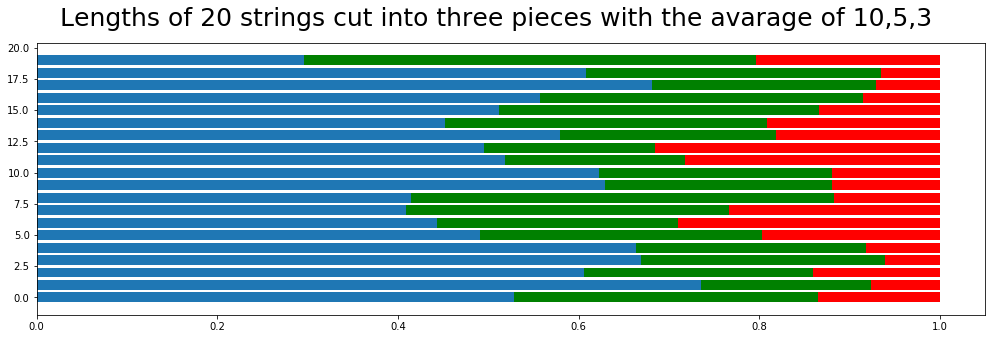

In [28]:
#Create figure
fig = plt.figure(figsize=(17,5))
p=fig.add_subplot(111)
p.barh(range(20), s[0])
p.barh(range(20), s[1], left=s[0], color='g')
p.barh(range(20), s[2], left=s[0]+s[1], color='r')
#Add label to the figure
fig.suptitle("Lengths of 20 strings cut into three pieces with the avarage of 10,5,3",fontsize=25)

### Exponential distribution
Exponential distribution is often used to find the probability of an event occuring over time.

_Roughly speaking, the time we need to wait before an event occurs has an exponential distribution if the probability that the event occurs during a certain time interval is proportional to the length of that time interval._[source](https://www.statlect.com/probability-distributions/exponential-distribution)

It takes the lambda as scale parameter. This defaults to 0.
The second parameter is the size of the return array. It can be a number or a shape.

Text(0.5, 0.98, 'Exponential distribution of 100 with the scale of 1.5')

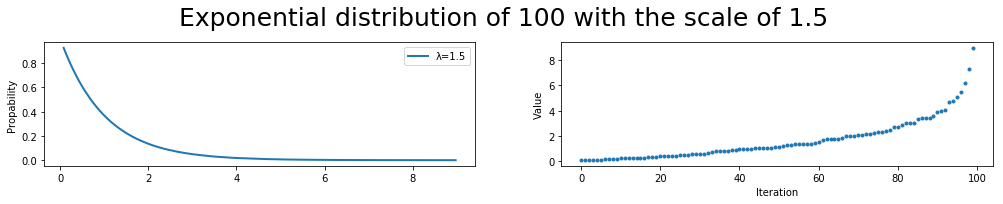

In [29]:
#Create data
csd=np.random.exponential(1.5, 100)
csd.sort()
#Create figure
fig = plt.figure(figsize=(17,5))
p=fig.add_subplot(221)
p.plot(csd,stats.expon.pdf(csd),linewidth=2,label="λ=1.5")
p.set_ylabel("Propability")
p.legend(loc='upper right')
p2=fig.add_subplot(222)
#Create scatter digaram
p2.plot(csd,'.')
p2.set_xlabel("Iteration")
p2.set_ylabel("Value")
#Add label to the figure
fig.suptitle("Exponential distribution of 100 with the scale of 1.5",fontsize=25)

### Gamma distribution
Gamma distribution built on the [Gamma function](https://en.wikipedia.org/wiki/Gamma_function). It has related to normal distribution, exponential distrubtion and chi-distribution. 

_Variations of gamma distribution_ shows when we change alfa we change the curve as well. It is clearly visible when alfa is 1 the distribution is the same as exponential distribution. 

When alfa is set to 2,3,4,6 or 9 it produces the same curves as Chi-distribution with different digrees of freedom. In fact when the shape is 2 and scale is 2,the curve is the same as Chi-distirbution with degree of freedom 3.


In [30]:
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
dg = npr.gamma(2., 2., 1000)

Text(0.5, 1.0, 'Variations of gamma distribution')

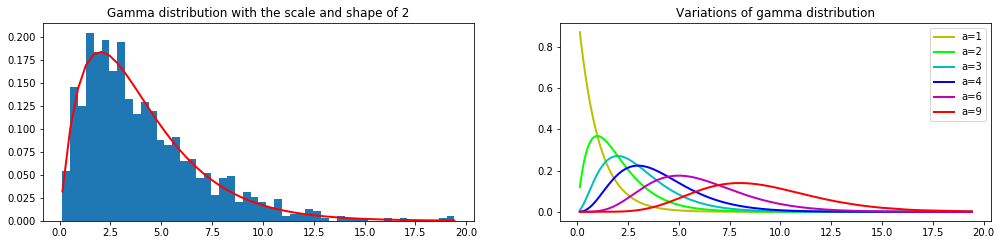

In [31]:
#Create figure
fig = plt.figure(figsize=(17,8))
p=fig.add_subplot(221)
count, bins, ignored = plt.hist(dg, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /
                      (sps.gamma(shape)*scale**shape))
p.plot(bins, y, linewidth=2, color='r')
p.set_title('Gamma distribution with the scale and shape of 2')

p2=fig.add_subplot(222)
dg.sort()
dg=dg[0:1000]
p2.plot(dg,stats.gamma.pdf(dg, 1),linewidth=2, color='y', label="a=1")
p2.plot(dg,stats.gamma.pdf(dg, 2),linewidth=2, color='lime', label="a=2")
p2.plot(dg,stats.gamma.pdf(dg, 3),linewidth=2, color='c',label="a=3")
p2.plot(dg,stats.gamma.pdf(dg, 4),linewidth=2, color='b',label="a=4")
p2.plot(dg,stats.gamma.pdf(dg, 6),linewidth=2, color='m',label="a=6")
p2.plot(dg,stats.gamma.pdf(dg, 9),linewidth=2, color='r',label="a=9")
p2.legend(loc='upper right')
p2.set_title('Variations of gamma distribution')